#### 1) Segment the given image using normlized graph-cuts. Vary the following parameters: compactness and n_segments(slic function), thresh(cut_normalized function). Display segmentation results for several parameters and state their effect on the output. 

C:\Users\Filip\Anaconda3\envs\myWindowsCV\lib\site-packages\skimage\segmentation\slic_superpixels.py:156: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  segments_z = grid_z[slices]
C:\Users\Filip\Anaconda3\envs\myWindowsCV\lib\site-packages\skimage\segmentation\slic_superpixels.py:157: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  segments_y = grid_y[slices]
C:\Users\Filip\Anaconda3\envs\myWindowsCV\lib\site-packages\skimage\segmentation\slic_superpixels.py:158: FutureWarning: Using a non-tuple sequence for multidimensional indexing is dep

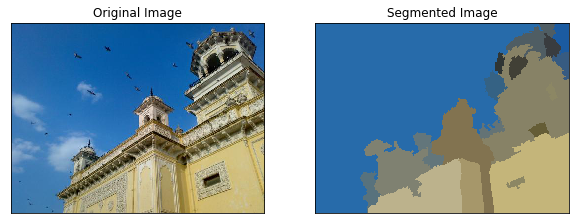

In [2]:
from skimage import segmentation, color
from skimage.future import graph
from matplotlib import pyplot as plt
import cv2

# Read image
img = cv2.cvtColor(cv2.imread('home.jpg'), cv2.COLOR_BGR2RGB)

# apply k-means. This will generate super pixels
labels1 = segmentation.slic(img, compactness=5, n_segments=400)

# apply graph cut
g = graph.rag_mean_color(img, labels1, mode='similarity')
labels2 = graph.cut_normalized(labels1, g)
out2 = color.label2rgb(labels2, img, kind='avg')

# display
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(img), plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(out2), plt.title("Segmented Image"), plt.xticks([]), plt.yticks([])

plt.show()

*Effect of compactness*

This parameter defines the tradeoff of the model between the color similarity and proximity of the clusters. This means that a higer compactness will favors more space proximity than color proximity. 


*Effect of n_segments*

This parameter defines the number of clusters in the output image.

*Effect of thresh*

This parameter sets a threshold on the maximum number of segmentation if a region. Hence, the lower the treshold, the more regrouping of regions next to eachother. 

#### 2) Segment the given image using mean-shift. Vary the following parameters: ratio, kernel_size, max_dist. Display segmentation results for several parameters and state their effect on the output. 

In [ ]:
from skimage.segmentation import quickshift

# Read image
img = cv2.cvtColor(cv2.imread('home.jpg'), cv2.COLOR_BGR2RGB)

# apply meanshift
label1 = quickshift(img, max_dist=5)
out1 = color.label2rgb(label1, img, kind='avg')

label2 = quickshift(img, max_dist=20)
out2 = color.label2rgb(label2, img, kind='avg')

label3 = quickshift(img, max_dist=50)
out3 = color.label2rgb(label3, img, kind='avg')

label4 = quickshift(img, ratio=1, max_dist=20)
out4 = color.label2rgb(label4, img, kind='avg')

label5 = quickshift(img,ratio=0.5, max_dist=20)
out5 = color.label2rgb(label5, img, kind='avg')

label6 = quickshift(img,ratio=0, max_dist=20)
out6 = color.label2rgb(label6, img, kind='avg')

label7 = quickshift(img,kernel_size = 5, max_dist=20)
out7 = color.label2rgb(label7, img, kind='avg')

label8 = quickshift(img, kernel_size=10, max_dist=20)
out8 = color.label2rgb(label8, img, kind='avg')

label9 = quickshift(img,kernel_size=20, max_dist=20)
out9 = color.label2rgb(label9, img, kind='avg')


In [ ]:
# display
plt.figure(figsize=(10,10))
plt.subplot(131), plt.imshow(out1), plt.title("Varying max_dist: 5"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(out2), plt.title("Varying max_dist: 20"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(out3), plt.title("Varying max_dist: 50"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(10,10))
plt.subplot(131), plt.imshow(out4), plt.title("Varying ratio: 1"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(out5), plt.title("Varying ratio: 0.5 "), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(out6), plt.title("Varying ratio: 0"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(10,10))
plt.subplot(131), plt.imshow(out7), plt.title("Varying kernel_size: 5"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(out8), plt.title("Varying kernel_size: 10"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(out9), plt.title("Varying kernel_size: 20"), plt.xticks([]), plt.yticks([])

plt.show()

*Effect of ratio*

This parameter balances color-space proximity and image-space proximity. From the plotted images, a higher ratio represents gives more weight to color-space proxomity. 

*Effect of kernel_size*

This is the parameter that represents the width of the gaussian kernel used in smoothing the sample density. From the plotted images, a high kernel_size means the data is grouped in fewer clusters.

*Effect of max_dist*

This is the parameter that represents the cut-off point for for data distances. From the plotted images, a higher max_dist has an effect of having fewer clusters.